# Machine Learning Diabetes Prediction

In [463]:
# Importing libraries

import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

In [464]:
# Reading the dataset
diabetes_df = pd.read_csv('../Data/diabetes.csv')
# Printing the first 5 rows of the dataframe.
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [465]:
# information about the dataset
diabetes_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [466]:
# Print the size of the data set. It consists of 768 observation units and 9 variables.
print("Dataset shape:", diabetes_df.shape)

Dataset shape: (768, 9)


- Missing Observation Analysis
- We saw on df.head() that some features contain 0, it doesn't make sense here and this indicates missing value. Below we replace 0 value by NaN:

In [467]:
# Print the distribution of the Outcome variable.
diabetes_df["Outcome"].value_counts()*100/len(diabetes_df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [468]:
# Print the classes of the outcome variable.
diabetes_df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [469]:
diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [470]:
# Now, we can look at where are missing values
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [471]:
# The missing values will be filled with the median values of each variable
def median_target(var):   
    temp = diabetes_df[diabetes_df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [472]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = diabetes_df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df[i].isnull()), i] = median_target(i)[i][0]
    diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df[i].isnull()), i] = median_target(i)[i][1]

In [473]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [474]:
# Number of missing values
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [475]:
# Conducting a stand alone observation review for the Insulin variable
# Suppressing contradictory values
Q1 = diabetes_df.Insulin.quantile(0.25)
Q3 = diabetes_df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
diabetes_df.loc[diabetes_df["Insulin"] > upper,"Insulin"] = upper

In [476]:
# Determining the outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(diabetes_df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [477]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.05893469, -2.37289269, -2.15297995, -2.09708735, -2.0772561 ,
       -1.95255968, -1.86384019, -1.74003158, -1.72703492, -1.71674689,
       -1.70343883, -1.6688722 , -1.64296768, -1.64190437, -1.61620872,
       -1.61369917, -1.60057603, -1.5988774 , -1.59608032, -1.57027568,
       -1.55876022, -1.55674614, -1.51852389, -1.50843907, -1.50280943,
       -1.50160698, -1.48391514, -1.4752983 , -1.4713427 , -1.47006248])

In [478]:
# Choosing the threshold value according to lof scores
threshold = np.sort(df_scores)[7]
threshold

np.float64(-1.740031580305444)

In [479]:
# Deleting those that are higher than the threshold
outlier = df_scores > threshold
diabetes_df = diabetes_df[outlier]

In [480]:
# Examining the size of the data.
diabetes_df.shape

(760, 9)

- Creating new variables is important for models. But we need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.

In [481]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
diabetes_df["NewBMI"] = NewBMI
diabetes_df.loc[diabetes_df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
diabetes_df.loc[(diabetes_df["BMI"] > 18.5) & (diabetes_df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
diabetes_df.loc[(diabetes_df["BMI"] > 24.9) & (diabetes_df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
diabetes_df.loc[(diabetes_df["BMI"] > 29.9) & (diabetes_df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
diabetes_df.loc[(diabetes_df["BMI"] > 34.9) & (diabetes_df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
diabetes_df.loc[diabetes_df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [482]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [483]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [484]:
# The operation performed was added to the dataframe.
diabetes_df = diabetes_df.assign(NewInsulinScore=diabetes_df.apply(set_insulin, axis=1))

diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [485]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
diabetes_df["NewGlucose"] = NewGlucose
diabetes_df.loc[diabetes_df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
diabetes_df.loc[(diabetes_df["Glucose"] > 70) & (diabetes_df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
diabetes_df.loc[(diabetes_df["Glucose"] > 99) & (diabetes_df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
diabetes_df.loc[diabetes_df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [486]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 1,Abnormal,Secret
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Overweight,Normal,Normal
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Normal,Abnormal,Secret
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


- Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

In [487]:
# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values. It is also protected from the Dummy variable trap.
diabetes_df = pd.get_dummies(diabetes_df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [488]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,True,False,False,False,False,False,False,False,False,True
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,False,False,True,False,True,False,True,False,False
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,False,False,False,False,False,False,False,False,False,True
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,False,False,True,False,True,False,True,False,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,False,True,False,False,False,False,False,False,True


In [489]:
categorical_df = diabetes_df[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [490]:
# creating features and label 

y = diabetes_df["Outcome"]
x = diabetes_df.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)

cols = x.columns
index = x.index


In [491]:
# The variables in the data set are an effective factor in increasing the performance of the models by standardization.  
# There are multiple standardization methods. These are methods such as "Normalize", "MinMax", "Robust" and "Scale".
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(x)
x = transformer.transform(x)
x = pd.DataFrame(x, columns = cols, index = index)

In [492]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [493]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

- Models :

- Model 1 : Logistic Regression
- Model 2 : KNearestNeighbors
- Model 3 : SVM
- Model 4 : Decision Tree
- Model 5 : Random Forest
- Model 6 : Gradient Boosting
- Model 7 : XGBoost

-  This approach will help us to keep the predictions much more accurate.
- In the below code we will be training all the seven models on the train data, checking the quality of our models using a accuracy.


In [494]:
accuracies={}
from sklearn.metrics import accuracy_score

# Model 1 : Logistic Regression

In [495]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred1 = lr.predict(x_test)

acc1=accuracy_score(y_test,y_pred1)
accuracies['LR']=acc1*100

print("Training accuracy score of the model is:",accuracy_score(y_train, lr.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred1)*100,"%")

Training accuracy score of the model is: 78.57142857142857 %
Testing accuracy score of the model is: 81.14035087719299 %


# Model 2 : KNearestNeighbors

In [496]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(x_train,y_train)

y_pred2 = knn.predict(x_test)

acc2=accuracy_score(y_test,y_pred2)
accuracies['KNN']=acc2*100

print("Training accuracy score of the model is:",accuracy_score(y_train, knn.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred2)*100,"%")

Training accuracy score of the model is: 88.90977443609023 %
Testing accuracy score of the model is: 84.64912280701753 %


# Model 3 : SVM

In [497]:
from sklearn.svm import SVC

svc = SVC(C = 1, gamma = 0.1, probability=True)
svc.fit(x_train, y_train)

y_pred3 = svc.predict(x_test)

acc3=accuracy_score(y_test,y_pred3)
accuracies['SVM']=acc3*100

print("Training accuracy score of the model is:",accuracy_score(y_train, svc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred3)*100,"%")

Training accuracy score of the model is: 88.53383458646617 %
Testing accuracy score of the model is: 85.96491228070175 %


# Model 4 : Decision Tree

In [498]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred4 = dtc.predict(x_test)

acc4=accuracy_score(y_test,y_pred4)
accuracies['DT']=acc4*100

print("Training accuracy score of the model is:",accuracy_score(y_train, dtc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred4)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 83.77192982456141 %


In [499]:
# Model 5 : Random Forest

In [500]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rfc.fit(x_train, y_train)

y_pred5 = rfc.predict(x_test)

acc5=accuracy_score(y_test,y_pred5)
accuracies['RF'] = acc5 * 100

print("Training accuracy score of the model is:",accuracy_score(y_train, rfc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred5)*100,"%")

Training accuracy score of the model is: 98.68421052631578 %
Testing accuracy score of the model is: 89.47368421052632 %


# Model 6 : Gradient Boosting

In [501]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'log_loss', n_estimators = 180)
gbc.fit(x_train, y_train)

y_pred6 = gbc.predict(x_test)

acc6 = accuracy_score(y_test,y_pred6)
accuracies['GradientBoosting']=acc6*100

print("Training accuracy score of the model is:",accuracy_score(y_train, gbc.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred6)*100,"%")

Training accuracy score of the model is: 100.0 %
Testing accuracy score of the model is: 90.35087719298247 %


# Model 7 : XGBoost

In [502]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)

xgb.fit(x_train, y_train)
y_pred7 = xgb.predict(x_test)

acc7=accuracy_score(y_test,y_pred7)

accuracies['XGBoost']=acc7*100
print("Training accuracy score of the model is:",accuracy_score(y_train, xgb.predict(x_train))*100,"%")
print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred7)*100,"%")

Training accuracy score of the model is: 96.05263157894737 %
Testing accuracy score of the model is: 86.8421052631579 %


In [503]:
# Model Comparison
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM',  'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XgBoost'],
    'Score': [acc1, acc2, acc3, acc4, acc5, acc6, acc7]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,Gradient Boosting,0.903509
4,Random Forest,0.894737
6,XgBoost,0.868421
2,SVM,0.859649
1,KNN,0.846491
3,Decision Tree,0.837719
0,Logistic Regression,0.811404


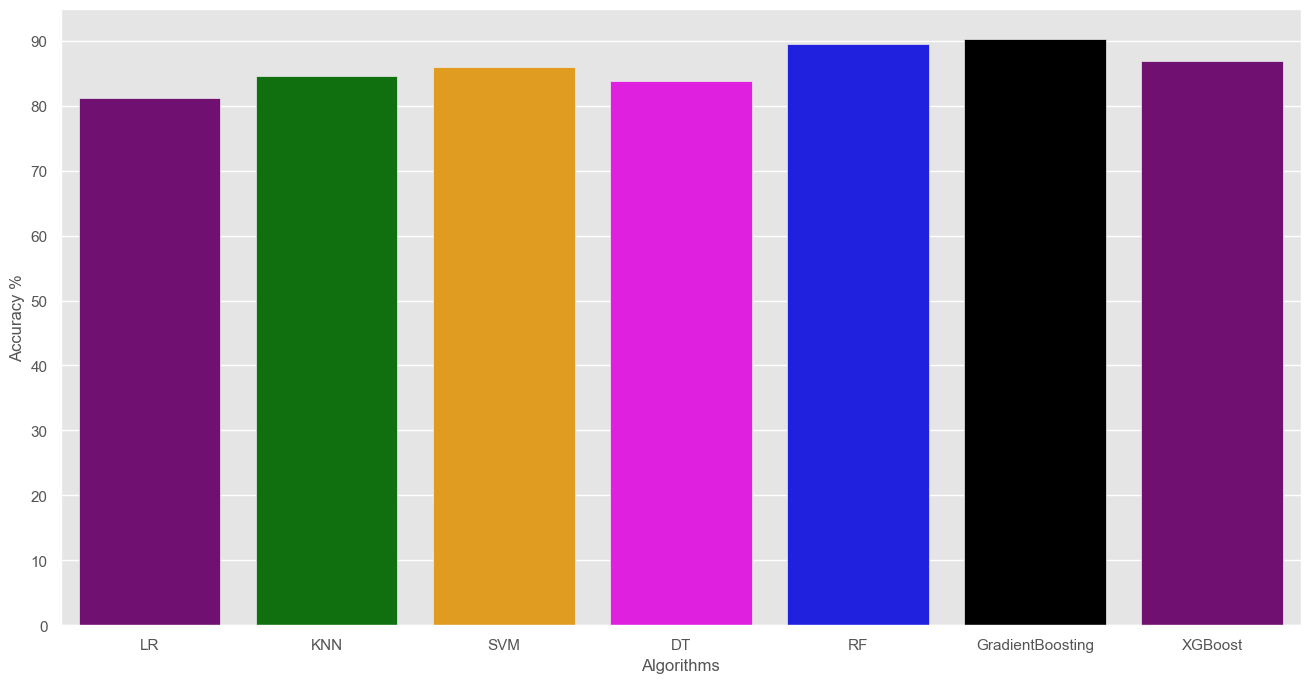

In [504]:
colors = ["purple", "green", "orange", "magenta","blue","black"]

# sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

- Model 6 : Gradient Boosting has the highest accuracy

In [509]:
import pickle
model = gbc
pickle.dump(model, open("../Models/diabetes.pkl",'wb'))

In [510]:
type(model)

sklearn.ensemble._gb.GradientBoostingClassifier

In [511]:
import numpy as np

#non_diabetic_input = np.array([[1, 85, 66, 29, 0, 26.6, 0.351, 31]])  # Typical Non-Diabetic Case
non_diabetic_input = np.array([[1,89,66,23,94,28.1,0.167,21]])
non_diabetic_input = non_diabetic_input.reshape(1, -1)

prediction = model.predict(non_diabetic_input)
print("Diabetes Diagnosis:", "Diabetic" if prediction[0] == 1 else "Non-Diabetic")


Diabetes Diagnosis: Non-Diabetic


In [512]:
diabetic_input = np.array([[6, 148, 72, 35, 80, 33.6, 0.627, 50]])  # Typical Diabetic Case
#diabetic_input = np.array([[8,183,64,0,0,23.3,0.672,32]])
diabetic_input = diabetic_input.reshape(1, -1)

prediction = model.predict(diabetic_input)
print("Diabetes Diagnosis:", "Diabetic" if prediction[0] == 1 else "Non-Diabetic")


Diabetes Diagnosis: Diabetic
